<a href="https://colab.research.google.com/github/angelcaptan/66552024_MovieSuccess_FinalProject/blob/main/66552024_MovieSuccessPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

**Author: Angel Jasmine Captan**

**Assignment: Intro to AI Final Summative Project**

## Description
This project aims to revolutionize the film industry by developing a Python-based movie success prediction system. By leveraging machine learning algorithms, including Random Forest, XGBoost, and Multilayer Perceptron Model, the system is designed to forecast a movie's success based on various attributes such as budget, popularity score, revenue, voting average rating, voting count, and genre.

The ensemble model combines the predictions of these three models, offering a comprehensive approach to success prediction. The model was trained on the Kaggle Movies MetaData Dataset, encompassing data from thousands of movies. Key applications include assisting investors in gauging the risk of movie investments, aiding filmmakers in decision-making, and guiding viewers towards films they are more likely to enjoy.


If a movie's profit margin surpasses 50%(0.5), it is considered successful, providing valuable insights for stakeholders across the film business.



## Imports and Data Loading
This section of the notebook will be dedicated to installing, loading datasets and libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle




from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From the Movies Dataset on Kaggle I decide to pick the movies_metadata.csv that houses 45,466 movies with 24 features.

In [2]:
#loading datasets
movieD = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies_metadata.csv')



<ipython-input-2-dbda92929b34>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movieD = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movies_metadata.csv')


# Data Preprocessing

This section focuses on cleaning,trimming and shaping the data so that its suitable for training.

In [3]:
#Lets Look at the data to see the content housed in the different columns.
movieD.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


 **Looking at the data , there are some columns that won't help in my prediction since they are either not numerical values/not reevant to prediction and would need to be dropped in order to have the suitable data for training**

## EDA, Imputation and Encoding

In [4]:
#Lets drop the unecessary columns in dataset.
movieD.drop(['id','belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime','title', 'spoken_languages', 'status', 'tagline', 'video', 'adult'], axis=1, inplace=True)


In [5]:
#Now lets look at the data, as you can see the dataset now houses only relevant to prediction data.
movieD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45466 non-null  object 
 1   genres        45466 non-null  object 
 2   popularity    45461 non-null  object 
 3   revenue       45460 non-null  float64
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.1+ MB


In [68]:
movieD.vote_count.max()

14075.0

In [6]:
#Checking how many rows in the Dataframe movieD have a value of 0 in the target variable column.

movieD[movieD['revenue'] == 0].shape

(38052, 6)

There are 38,052 rows and 9 columns in the DataFrame where the 'revenue' column has a value equal to 0. This shows a significant portion of movies in the dataset has a recorded revenue of 0, suggesting a lack of information regarding their total earnings however since theres still 7,414 with revenue recorded, i'll just use those instead.

In [7]:
#Replace all occurrences of the value 0 in the 'revenue' with Nan
movieD['revenue'] = movieD['revenue'].replace(0, np.nan)

In [8]:
#Clean Budget Similarly
movieD['budget'] = pd.to_numeric(movieD['budget'], errors='coerce')
movieD['budget'] = movieD['budget'].replace(0, np.nan)
movieD[movieD['budget'].isnull()].shape


(36576, 6)

Now that The Revenue and Budget has been Cleaned and conflictng values have been dealt with, I can now create a new column named Success to use as a target variable later. This "Success" is defined as 'Success' if the profit margin is greater than 50%, 'loss' if the profit is negative, and again 'loss' if the profit is non-negative but less than 50%.

In [10]:
# Creating a New Feature To Show Financial Success of A Movie
L=[]
for i, rows in movieD.iterrows():
  if((rows['revenue'] - rows['budget'])<0):
    L.append('loss')
  elif(((rows['revenue'] - rows['budget']) / rows['budget'])>0.5):
    L.append('Success')
  else:
    L.append('loss')


In [11]:
L.count('Success') #now see number of successes

3198

In [12]:
L.count('loss') #now see number of losses

42268

In [13]:
movieD['Success']=L #The values of L are now created as a new column in movieD


In [14]:
movieD.head() # Now lets quickly inspect the contents of movieD to see the changes.

,budget,genres,popularity,revenue,vote_average,vote_count,Success
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,373554033.0,7.7,5415.0,Success
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,262797249.0,6.9,2413.0,Success
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,NaN,6.5,92.0,loss
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,81452156.0,6.1,34.0,Success
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",8.387519,76578911.0,5.7,173.0,loss


In [15]:
movieD.info() #lets see a summary of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        8890 non-null   float64
 1   genres        45466 non-null  object 
 2   popularity    45461 non-null  object 
 3   revenue       7408 non-null   float64
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
 6   Success       45466 non-null  object 
dtypes: float64(4), object(3)
memory usage: 2.4+ MB


Feature importance isnt necessary since 7 columns remain when unneccesary columns have already been removed.Also now we need to deal with the non numerical columns like Success, popularity and genres and the best way to do that is to encode and impute if need be.

In [16]:
movieD['Success'],_=pd.factorize(movieD['Success']) #encode the categorical variable in the 'Success' column into numerical format

In [17]:
movieD.head() #lets see changes

,budget,genres,popularity,revenue,vote_average,vote_count,Success
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",21.946943,373554033.0,7.7,5415.0,0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",17.015539,262797249.0,6.9,2413.0,0
2,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.7129,NaN,6.5,92.0,1
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.859495,81452156.0,6.1,34.0,0
4,NaN,"[{'id': 35, 'name': 'Comedy'}]",8.387519,76578911.0,5.7,173.0,1


In [18]:
movieD.info() #now its left with genres and popularity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        8890 non-null   float64
 1   genres        45466 non-null  object 
 2   popularity    45461 non-null  object 
 3   revenue       7408 non-null   float64
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
 6   Success       45466 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.4+ MB


Now that Success has been dealt with, we now have to encode genres and clean popularity

Now lets be cleaning and converting certain columns to a numeric (float) data type.

## Visualization & Cleaning Adjustments

In [22]:
#Converts a value x to a float.If the conversion is successful, it returns the float value.Otherwise, returns Nan
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [23]:
#Now Apply This Rule To The Relevant Features
movieD['popularity'] = movieD['popularity'].apply(clean_numeric).astype('float')
movieD["vote_count"] = movieD["vote_count"].apply(clean_numeric).astype('float')
movieD['vote_average'] = movieD['vote_average'].apply(clean_numeric).astype('float')

The goal is to ensure that these columns contain numeric values in a format that can be used for numerical operations or machine learning tasks.

In [24]:
#Summary statistics of each feature (As you can see popularity has been changed to floats)
movieD['popularity'].describe()



count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [25]:
movieD['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [26]:
movieD['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

<ipython-input-27-f0ebbe3cb24e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movieD['popularity'].fillna(movieD['popularity'].median()))


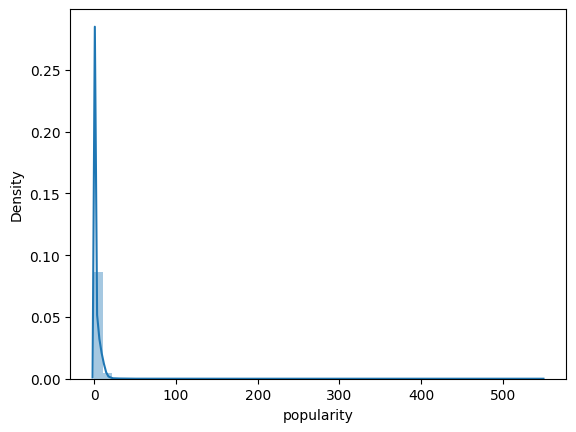

In [27]:
#Now lets visualize them
#Popularity First
import seaborn as sns

sns.distplot(movieD['popularity'].fillna(movieD['popularity'].median()))
plt.show()

<Axes: ylabel='Frequency'>

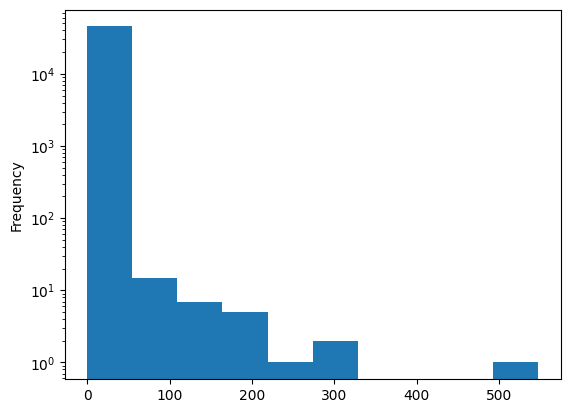

In [28]:
movieD['popularity'].plot(logy=True, kind='hist')

This visualization helps in understanding the distribution of popularity values in the dataset and how frequently certain ranges of popularity occur.As you can see a significant number of movies in the dataset have a popularity score with the frequency at its highest between 0 and 50.

In [29]:
#Lets look at the amount of people that voted
movieD['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [30]:
#Lets get rid of the 0 by replacing it with NAN for vote average
movieD['vote_average'] = movieD['vote_average'].replace(0, np.nan)
movieD['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

<ipython-input-31-6479aae65157>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movieD['vote_average'].fillna(movieD['vote_average'].median()))


<Axes: xlabel='vote_average', ylabel='Density'>

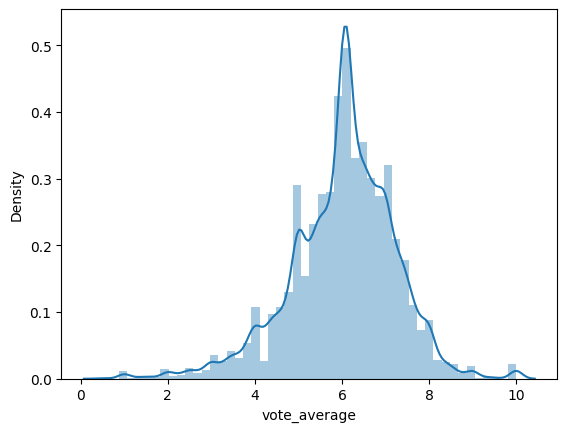

In [31]:
#Now lets visualize vote average
sns.distplot(movieD['vote_average'].fillna(movieD['vote_average'].median()))

This graph is to create a distribution plot for the 'vote_average' column, where missing values are imputed with the median value of the column. The distribution of vote averages is peaked around 6 out of 10, it suggests that a significant number of movies in the dataset have received ratings close to 6.

In [32]:
#Now lets try and explore the budget and revenue more:
#first lets get a description of it
movieD['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

<ipython-input-33-10e371a85351>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movieD[movieD['budget'].notnull()]['budget'])


<Axes: xlabel='budget', ylabel='Density'>

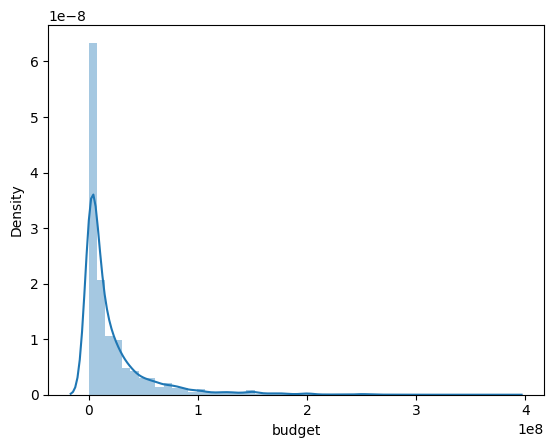

In [33]:
#Now lets visualize Budget
sns.distplot(movieD[movieD['budget'].notnull()]['budget'])

This code above is to create a distribution plot for the 'budget' column, excluding rows where the 'budget' is null.

<Axes: ylabel='Frequency'>

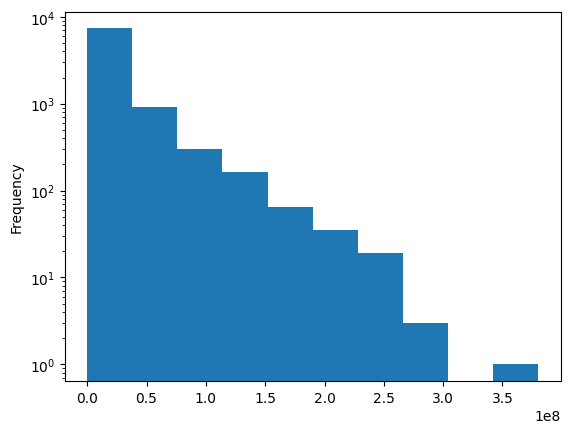

In [34]:

movieD['budget'].plot(logy=True, kind='hist')

This shows that a significant amount of  movies have relatively low budgets

In [35]:
movieD['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

<ipython-input-36-9dd70bdfe24a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movieD[movieD['revenue'].notnull()]['revenue'])


<Axes: xlabel='revenue', ylabel='Density'>

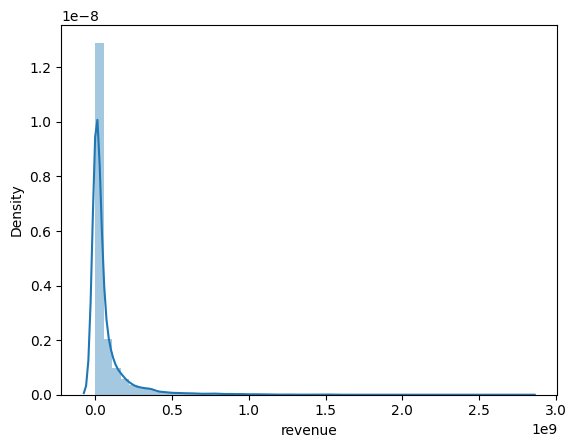

In [36]:
sns.distplot(movieD[movieD['revenue'].notnull()]['revenue'])

Revenue too shows a similar fate as budget.

## Dropping Missing Values


In [37]:
#First lets check for missing values
movieD.isnull().sum()

budget          36576
genres              0
popularity          6
revenue         38058
vote_average     3004
vote_count          6
Success             0
dtype: int64

So we have quite a bit of missing values, therefore we will drop rows with missing values

Now, there are no more missing values

In [38]:
#Dropping rows with missing values
movieD.dropna(inplace=True)
#Check the number of missing values to ensure we have none
movieD.isnull().sum()

budget          0
genres          0
popularity      0
revenue         0
vote_average    0
vote_count      0
Success         0
dtype: int64

In [39]:
#Lets see how our data is looking like now
movieD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5374 non-null   float64
 1   genres        5374 non-null   object 
 2   popularity    5374 non-null   float64
 3   revenue       5374 non-null   float64
 4   vote_average  5374 non-null   float64
 5   vote_count    5374 non-null   float64
 6   Success       5374 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.9+ KB


Lets be formatting the 'popularity' column by converting it to numeric format, rounding the numeric values to two decimal places.

In [40]:
movieD["popularity"] = np.round(pd.to_numeric(movieD.popularity, errors='coerce'),2)
movieD.info()
movieD.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5374 non-null   float64
 1   genres        5374 non-null   object 
 2   popularity    5374 non-null   float64
 3   revenue       5374 non-null   float64
 4   vote_average  5374 non-null   float64
 5   vote_count    5374 non-null   float64
 6   Success       5374 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.9+ KB


(5374, 7)

All thats left to do is genres now, first lets see how many genres we are working with

In [73]:
movieD.genres.max()

20

There are 20 genres in the dataset, we will keep it as such

Now we just have to encode genres but first I will be creating a dummy variable for genres because it seems that the genres information is stored between single quotes in the original 'genres' column with other unnecessary information, and the code below aims to extract this information and create a new column 'Genres' with just the type of genre.

In [41]:
#Lets take Just The Type out of the genre columns and convert it to panda
s = pd.Series(movieD['genres'], dtype= str)
s1=s.str.split(pat="'",expand=True)
movieD['Genres']=s1[5]

In [42]:
#count of each genre in the dataset
movieD['Genres'].value_counts()

Drama              1313
Comedy             1067
Action              960
Adventure           416
Horror              325
Crime               267
Thriller            199
Animation           146
Fantasy             140
Romance             121
Science Fiction     104
Mystery              67
Family               55
Documentary          47
War                  38
Music                34
Western              31
History              29
Foreign               4
TV Movie              1
Name: Genres, dtype: int64

As you can see most genres in the dataset are Drama and comedy, now lets drop our original genre column

In [43]:
#Drop original column from dataset
movieD.drop(['genres'], axis=1, inplace=True) #its no longer needed

In [44]:
#Encode New Genres
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movieD['Genres_encoded'] = le.fit_transform(movieD['Genres'])

In [45]:
movieD.drop(['Genres'], axis=1, inplace=True) #drop the unencoded Genres

In [47]:
#Rename to Just genres
movieD.rename(columns={'Genres_encoded': 'genres'}, inplace=True)

As you can see, all neccesary columns have been turned into floats and can be used for predicting.We now have 5,374 entries.

In [48]:
movieD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5374 non-null   float64
 1   popularity    5374 non-null   float64
 2   revenue       5374 non-null   float64
 3   vote_average  5374 non-null   float64
 4   vote_count    5374 non-null   float64
 5   Success       5374 non-null   int64  
 6   genres        5374 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 335.9 KB


However, looking at the info from MovieD dataset, Its maybe best to even check for outliers.

<Axes: >

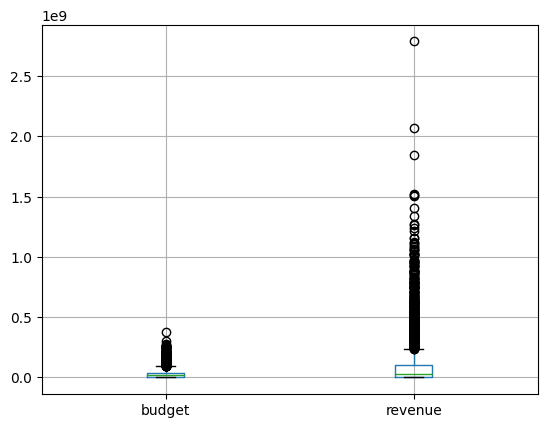

In [51]:
#Let's check for outliers
movieD.boxplot(column=['budget', 'revenue'])

There are 3 outliers for revenue

In [52]:
#Lets look at the shape of the original dataset movieD
movieD.shape
print ('Shape of original input dataset:', movieD.shape)

Shape of original input dataset: (5374, 7)


In [53]:
#calculate the interquartile range (IQR) for identifying potential outliers in the dataset
Q1 = movieD.quantile(0.25)
Q3 = movieD.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget          34863750.00
popularity             6.26
revenue         92959518.75
vote_average           1.20
vote_count           724.75
Success                1.00
genres                 5.00
dtype: float64


In [54]:
movieD_high = movieD.apply(lambda x : True
            if x['revenue'] > 13500000 or x['budget'] > 30000000 else False, axis = 1)
num_rows = len(movieD_high[movieD_high == True].index)

print('Number of Rows in dataframe with revenue more than 13.5 million dollars or budget more than 30 million: ',
      num_rows )

Number of Rows in dataframe with revenue more than 13.5 million dollars or budget more than 30 million:  3585


The code above calculates and prints the number of rows in movieD where either the 'revenue' is more than 13.5 million dollars or the 'budget' is more than 30 million dollars. Here, the answer is 3585 movies.This shows that alot of movies have high budget and low revenue.

Looking at this, i believe there is no need to remove the outliers as they would not cause much issue to the prediction process.

Now that the dataset is ready, time to look at the nature of the target variable 'success'


In [55]:
# check distribution of target variable
movieD['Success'].value_counts()

0    3196
1    2178
Name: Success, dtype: int64

In the end, we were able to preprocess and prepare our dataset from 45,466 movies with 24 features to 5374 movies and 8 features. Our data can now be scaled and used for prediction.

# Feature Engineering

## Feature Extraction

We dont need to do feature importance since the 8 features are enough, just by clearing the unnecessary, the needed features wer shown.

In [56]:
# the target variable and features; drop non-numeric columns if necessary
X = movieD.drop(columns=['Success'])
y = movieD['Success']

In [57]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

## Feature Scaling


At this stage our goal is to use finished dataset we have identified at our feature extraction stage to create subsetted data that we will use to train models.

In [58]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# The features are now scaled and ready for training the model.
X_scaled_movieD = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_movieD.head()

,budget,popularity,revenue,vote_average,vote_count,genres
0,-0.028022,0.880000,1.703454,1.575873,3.739586,-0.671918
1,0.843174,0.523315,1.037069,0.687419,1.341707,-0.882428
2,-0.376501,-0.428810,-0.054023,-0.201035,-0.558544,-0.461407
3,0.718717,0.588430,0.583651,1.575873,0.920760,-1.092938
4,0.096434,-0.329691,-0.156919,-0.867375,-0.446717,-1.092938


In [59]:
#Saving scaler to use in deployment

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Training Models

We are now reading to train some models, here we are going to train 3 modes looking at classification;
1. Random Forest
2. XGBoost
3. MLP






In [60]:
#Lets split data for training
X_train, X_test, y_train, y_test = train_test_split(X_scaled_movieD, y, test_size=0.3, random_state=84)

Lets create a function that is designed to simplify the process of hyperparameter tuning and model selection by using grid search and cross-validation. It will be used with different models by passing the model, parameter grid, features (X), and target variable (y) as arguments.

In [61]:
def train_model(model, param_grid, X, y):
    '''
        Trains a model using grid search with cross-validation and returns the best model.
        Parameters:
            model: scikit-learn model
            param_grid: dictionary with parameters to try
            X: features(independent variables)
            y: target(dependent variable)
    '''
    cv = KFold(n_splits=7 , random_state=69, shuffle=True)

    # Grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)

    # Results of the grid search
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score (Accuracy): {grid_search.best_score_}")  # We negate the score because grid search maximizes performance (so it negates the scores)

    return grid_search.best_estimator_  # Returns the best model

## Model 1: Random Forest Classifier

In [ ]:
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(random_state=39)
rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}
best_rf = train_model(rf_model, rf_params, X_train, y_train)


Training Random Forest...
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score (Accuracy): 0.9670317878973982


Best score (Accuracy): 0.9670317878973982 , a good model.

## Model 2: XGBoost

In [ ]:
print("\nTraining XGBoost...")
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.1, 0.001, 0.01],
    'max_depth': [3, 5, 9, 15],
    'colsample_bytree': [0.5, 0.75, 1]
}
best_xgb = train_model(xgb_model, xgb_params, X_train, y_train)


Training XGBoost...
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}
Best score (Accuracy): 0.9795257182019659


The Best score (Accuracy): 0.9795257182019659 , also a good model

## Model 3: MLP Model

In [ ]:
print("\nTraining MLP...")
mlp_model = MLPClassifier(random_state=42)
mlp_params = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}
best_mlp = train_model(mlp_model, mlp_params, X_train, y_train)



Training MLP...
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best score (Accuracy): 0.9803213304179016


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The Best score (Accuracy): 0.9803213304179016 , also a good model

## Model 4: Ensembled Model


This is an ensemble model that will combine the best versions of my 3 models into a single model.

In [ ]:
# Create an ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('mlp', best_mlp),

    ]
)

In [ ]:
# Fit model on the training data
print("\nTraining Ensemble Model...")
ensemble.fit(X_train, y_train)

# Predict and evaluate on the training set
train_pred = ensemble.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Ensemble model accuracy on training set: {train_accuracy}")


Training Ensemble Model...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble model accuracy on training set: 0.9992023398032438


The Ensemble Model Accuracy is 0.9992023398032438 . Great!

Let's save so we don't have to incur cost of training if runtime fails

## Saving Models

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [ ]:
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

with open('best_mlp_model.pkl', 'wb') as file:
    pickle.dump(best_mlp, file)

with open('ensemble_model.pkl', 'wb') as file:
    pickle.dump(ensemble, file)

Test if model saved well

In [ ]:
with open('ensemble_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)

en_acc = accuracy_score(y_test, predictions)

print(f"Ensemble model Accuracy on test set: {en_acc}")

Ensemble model Accuracy on test set: 0.9832610043397396


It Saved Well

# Evaluation

We are going to evaluate the models using f1 score, precision,confusion matrix and classification reports.Multiplying the results by 100 and rounding to 2 decimal points using the round function:

## Random Forest Evaluation

In [62]:
#predict on test set
rf_pred = best_rf.predict(X_test)


# Evaluate using accuracy score, precision, recall, F1 score, confusion matrix, and classification report
rf_accuracy = round(accuracy_score(y_test, rf_pred) * 100, 2)
rf_precision = round(precision_score(y_test, rf_pred, average='weighted') * 100, 2)
rf_recall = round(recall_score(y_test, rf_pred, average='weighted') * 100, 2)
rf_f1 = round(f1_score(y_test, rf_pred, average='weighted') * 100, 2)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

NameError: ignored

In [199]:
print("\nEvaluating Random Forest...")

print(f"Random Forest Classifier Accuracy: {rf_accuracy}")
print(f"Random Forest Classifier Precision: {rf_precision}")
print(f"Random Forest Classifier Recall: {rf_recall}")
print(f"Random Forest Classifier F1 Score: {rf_f1}")


Evaluating Random Forest...
Random Forest Classifier Accuracy: 96.22
Random Forest Classifier Precision: 96.22
Random Forest Classifier Recall: 96.22
Random Forest Classifier F1 Score: 96.21


In [202]:
print(f"Random Forest Classifier Confusion Matrix:\n{rf_conf_matrix}")

Random Forest Classifier Confusion Matrix:
[[930  24]
 [ 37 622]]


In [203]:
print(f"Random Forest Classifier Classification Report:\n{rf_class_report}")

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       954
           1       0.96      0.94      0.95       659

    accuracy                           0.96      1613
   macro avg       0.96      0.96      0.96      1613
weighted avg       0.96      0.96      0.96      1613



## XGBoost Evaluation

In [200]:
#predict on test set
xgb_pred = best_xgb.predict(X_test)


# Evaluate using accuracy, precision, recall, F1 score, confusion matrix, and classification report
xgb_accuracy = round(accuracy_score(y_test, xgb_pred) * 100, 2)
xgb_precision = round(precision_score(y_test, xgb_pred, average='weighted') * 100, 2)
xgb_recall = round(recall_score(y_test, xgb_pred, average='weighted') * 100, 2)
xgb_f1 = round(f1_score(y_test, xgb_pred, average='weighted') * 100, 2)
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
xgb_class_report = classification_report(y_test, xgb_pred)

In [201]:
print("\nEvaluating XGBoost...")


print(f"XGBoost Classifier Accuracy: {xgb_accuracy}")
print(f"XGBoost Classifier Precision: {xgb_precision}")
print(f"XGBoost Classifier Recall: {xgb_recall}")
print(f"XGBoost Classifier F1 Score: {xgb_f1}")


Evaluating XGBoost...
XGBoost Classifier Accuracy: 97.64
XGBoost Classifier Precision: 97.64
XGBoost Classifier Recall: 97.64
XGBoost Classifier F1 Score: 97.64


In [204]:
print(f"XGBoost Classifier Confusion Matrix:\n{xgb_conf_matrix}")

XGBoost Classifier Confusion Matrix:
[[936  18]
 [ 20 639]]


In [205]:
print(f"XGBoost Classifier Classification Report:\n{xgb_class_report}")

XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       954
           1       0.97      0.97      0.97       659

    accuracy                           0.98      1613
   macro avg       0.98      0.98      0.98      1613
weighted avg       0.98      0.98      0.98      1613



## MLP Evaluation

In [206]:
#predict on test set
mlp_pred = best_mlp.predict(X_test)

# Evaluate using accuracy, precision, recall, F1 score, confusion matrix, and classification report
mlp_accuracy = round(accuracy_score(y_test, mlp_pred) * 100, 2)
mlp_precision = round(precision_score(y_test, mlp_pred, average='weighted') * 100, 2)
mlp_recall = round(recall_score(y_test, mlp_pred, average='weighted') * 100, 2)
mlp_f1 = round(f1_score(y_test, mlp_pred, average='weighted') * 100, 2)
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
mlp_class_report = classification_report(y_test, mlp_pred)

In [207]:
print("\nEvaluating MLP...")


print(f"MLP Classifier Accuracy: {mlp_accuracy}")
print(f"MLP Classifier Precision: {mlp_precision}")
print(f"MLP Classifier Recall: {mlp_recall}")
print(f"MLP Classifier F1 Score: {mlp_f1}")




Evaluating MLP...
MLP Classifier Accuracy: 98.64
MLP Classifier Precision: 98.65
MLP Classifier Recall: 98.64
MLP Classifier F1 Score: 98.64


In [208]:
print(f"MLP Classifier Confusion Matrix:\n{mlp_conf_matrix}")

MLP Classifier Confusion Matrix:
[[938  16]
 [  6 653]]


In [209]:
print(f"MLP Classifier Classification Report:\n{mlp_class_report}")

MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       954
           1       0.98      0.99      0.98       659

    accuracy                           0.99      1613
   macro avg       0.98      0.99      0.99      1613
weighted avg       0.99      0.99      0.99      1613



## Ensemble Evaluation

In [210]:
#predict on test set
ensemble_pred = ensemble.predict(X_test)

# Evaluate using accuracy, precision, recall, F1 score, confusion matrix, and classification report
ensemble_accuracy = round(accuracy_score(y_test, ensemble_pred) * 100, 2)
ensemble_precision = round(precision_score(y_test, ensemble_pred, average='weighted') * 100, 2)
ensemble_recall = round(recall_score(y_test, ensemble_pred, average='weighted') * 100, 2)
ensemble_f1 = round(f1_score(y_test, ensemble_pred, average='weighted') * 100, 2)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_pred)
ensemble_class_report = classification_report(y_test, ensemble_pred)

In [211]:
print("\nEvaluating Ensemble...")

print(f"Ensemble Model Accuracy: {ensemble_accuracy}")
print(f"Ensemble Model Precision: {ensemble_precision}")
print(f"Ensemble Model Recall: {ensemble_recall}")
print(f"Ensemble Model F1 Score: {ensemble_f1}")


Evaluating Ensemble...
Ensemble Model Accuracy: 98.33
Ensemble Model Precision: 98.33
Ensemble Model Recall: 98.33
Ensemble Model F1 Score: 98.33


In [212]:
print(f"Ensemble Model Confusion Matrix:\n{ensemble_conf_matrix}")

Ensemble Model Confusion Matrix:
[[942  12]
 [ 15 644]]


In [213]:
print(f"Ensemble Model Classification Report:\n{ensemble_class_report}")

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       954
           1       0.98      0.98      0.98       659

    accuracy                           0.98      1613
   macro avg       0.98      0.98      0.98      1613
weighted avg       0.98      0.98      0.98      1613



In [63]:
!pip freeze > requirements.txt